In [1]:
import pandas as pd
from statsmodels.stats.weightstats import _tconfint_generic
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Задание 1

In [2]:
path_to_project_directory = '/content/drive/My Drive/Colab Notebooks/SEVERSTAL_task/Data/'

In [3]:
statistics = pd.read_csv(path_to_project_directory+'Статистика за 2018 год.csv', encoding='cp1251')
statistics

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B
...,...,...,...
232,1,4.7,A
233,3,3.4,A
234,2,5.5,A
235,3,5.0,B


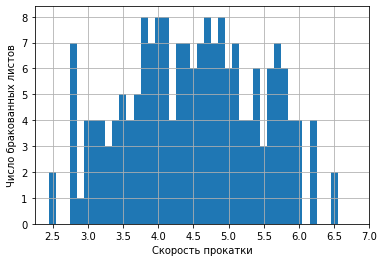

In [4]:
plt.bar(statistics['Скорость прокатки'],
        statistics['Число бракованных листов'],
        width=0.1)
plt.xlabel('Скорость прокатки')
plt.ylabel('Число бракованных листов')
plt.yticks(statistics['Число бракованных листов'].unique())
plt.xticks(np.arange(min(statistics['Скорость прокатки']), 
                     max(statistics['Скорость прокатки'])+1, 
                     0.5))

plt.grid()

In [5]:
statistics[statistics['Марка стали']=='A']['Число бракованных листов'].mean(), \
statistics[statistics['Марка стали']=='B']['Число бракованных листов'].mean()

(3.179856115107914, 3.36734693877551)

95% доверительные интервалы для средних значений

In [6]:
_tconfint_generic(statistics[statistics['Марка стали']=='A']['Число бракованных листов'].mean(), 
                  statistics[statistics['Марка стали']=='A']['Число бракованных листов'].std(ddof=1) / np.sqrt(len(statistics[statistics['Марка стали']=='A']['Число бракованных листов'])),                  
                  len(statistics[statistics['Марка стали']=='A']['Число бракованных листов']) - 1, 
                  0.05, 'two-sided')

(2.8630226081965824, 3.4966896220192454)

In [7]:
_tconfint_generic(statistics[statistics['Марка стали']=='B']['Число бракованных листов'].mean(), 
                  statistics[statistics['Марка стали']=='B']['Число бракованных листов'].std(ddof=1) / np.sqrt(len(statistics[statistics['Марка стали']=='A']['Число бракованных листов'])),                  
                  len(statistics[statistics['Марка стали']=='B']['Число бракованных листов']) - 1, 
                  0.05, 'two-sided')

(3.0829856289671023, 3.651708248583918)

Действительно, в среднем брака на нашей выборке марки A больше, чем на B

In [8]:
statistics[statistics['Скорость прокатки']<=4]['Число бракованных листов'].mean(), \
statistics[statistics['Скорость прокатки']>4]['Число бракованных листов'].mean()

(3.0689655172413794, 3.3184357541899443)

Действительно, в среднем брака на нашей выборке со скоростью обкатки свыше 4-х м/с становится больше

<hr>

**Гипотеза 1**: Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.


In [9]:
statistics[(statistics['Марка стали']=='A') & (statistics['Число бракованных листов']>3)]['Число бракованных листов'].mean(), \
statistics[(statistics['Марка стали']=='B') & (statistics['Число бракованных листов']>3)]['Число бракованных листов'].mean()

(5.113207547169812, 4.886363636363637)

<hr>

**Гипотеза 2**: При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.


In [10]:
statistics[(statistics['Скорость прокатки']<=4) & (statistics['Число бракованных листов']>3)]['Число бракованных листов'].mean(), \
statistics[(statistics['Скорость прокатки']>4) & (statistics['Число бракованных листов']>3)]['Число бракованных листов'].mean()

(4.869565217391305, 5.054054054054054)

<hr>

## Задание 2

In [11]:
X_data = pd.read_csv(path_to_project_directory+'X_data.csv', encoding='cp1251', sep=';')
Y_train = pd.read_csv(path_to_project_directory+'Y_train.csv', encoding='cp1251', sep=';', header=None, index_col=0)
Y_submit = pd.read_csv(path_to_project_directory+'Y_submit.csv', encoding='cp1251', sep=';', header=None, index_col=0)

In [12]:
Y_train.head(3)

,1
0,
2015-01-04 00:05:00,392
2015-01-04 01:05:00,384
2015-01-04 02:05:00,393


In [13]:
Y_submit.head(3)

,1
0,
2018-05-04 00:05:00,420
2018-05-04 01:05:00,420
2018-05-04 02:05:00,420


In [14]:
X_data.head(3)

,Unnamed: 0,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22


In [15]:
X_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103841 entries, 0 to 2103840
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  2103841 non-null  object 
 1   T_data_1_1  2103841 non-null  int64  
 2   T_data_1_2  2103841 non-null  int64  
 3   T_data_1_3  2103841 non-null  int64  
 4   T_data_2_1  2103841 non-null  int64  
 5   T_data_2_2  2103841 non-null  int64  
 6   T_data_2_3  2103841 non-null  int64  
 7   T_data_3_1  2103841 non-null  int64  
 8   T_data_3_2  2103841 non-null  int64  
 9   T_data_3_3  2103841 non-null  int64  
 10  T_data_4_1  2103841 non-null  int64  
 11  T_data_4_2  2103841 non-null  int64  
 12  T_data_4_3  2103841 non-null  int64  
 13  T_data_5_1  2103841 non-null  int64  
 14  T_data_5_2  2103841 non-null  int64  
 15  T_data_5_3  2103841 non-null  int64  
 16  H_data      2103841 non-null  float64
 17  AH_data     2103841 non-null  float64
dtypes: float64(2), int64(1

Пропущенных значений нет. Все столбцы содержат 2103841 значений, что равняется длине всего датафрейма<hr>
Так как значения *H_data* и *AH_data* фиксируются на **входе**, то приходим к мнению, что в *1 колонке X_data* записано **время начала проката**. Чтобы сопоставить *данные с детекторов* и *данные о качестве*, которые составляются **на выходе обжиговой машины** к каждому значению X_data['Unnamed: 0'] прибавим время 1 полного прохода обжига, то есть 1 час.

In [16]:
from datetime import datetime, timedelta

print(X_data['Unnamed: 0'].dtype)
X_data['Unnamed: 0'] = pd.to_datetime(X_data['Unnamed: 0']) + timedelta(hours=1)
print(X_data['Unnamed: 0'].dtype)

object
datetime64[ns]


In [17]:
X_data = X_data.set_index(['Unnamed: 0'])
X_data

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
2015-01-01 01:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2015-01-01 01:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
2015-01-01 01:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
2015-01-01 01:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 00:56:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2019-01-01 00:57:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2019-01-01 00:58:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44


Составим датафрейм, состоящий только из данных, метрики качества которых нам известны:

In [22]:
X = X_data.loc[X_data.index.isin(Y_train.index)]
X.shape, Y_train.shape

((29184, 17), (29184, 1))

In [30]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(np_scaled, columns = X.columns)
X_scaled

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,0.501639,0.671053,0.485792,0.518482,0.592734,0.491604,0.521614,0.386343,0.562536,0.480025,0.480000,0.604681,0.328824,0.408066,0.491299,0.160019,0.189412
1,0.513661,0.652047,0.499323,0.511988,0.597036,0.501866,0.526417,0.387573,0.640346,0.486367,0.500000,0.605332,0.325702,0.405694,0.495315,0.142185,0.562353
2,0.513661,0.545322,0.497970,0.510989,0.596080,0.504664,0.524015,0.387573,0.650144,0.493342,0.510303,0.604031,0.328824,0.412811,0.479250,0.215143,0.451765
3,0.497268,0.494152,0.481732,0.513986,0.597514,0.481343,0.526417,0.386958,0.509510,0.499683,0.512121,0.602081,0.338189,0.423488,0.492637,0.135538,0.490588
4,0.476503,0.523392,0.470907,0.514486,0.594168,0.460821,0.533622,0.386650,0.565418,0.496512,0.504848,0.603381,0.352758,0.431791,0.500669,0.133106,0.469412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,0.490710,0.539474,0.483085,0.541459,0.622371,0.515858,0.502882,0.334051,0.522190,0.506024,0.486061,0.613784,0.337149,0.431791,0.520750,0.182069,0.549412
29180,0.491803,0.552632,0.489851,0.540460,0.619025,0.507463,0.499520,0.352199,0.519885,0.504122,0.482424,0.613134,0.328824,0.427046,0.508701,0.202173,0.495294
29181,0.493989,0.548246,0.481732,0.536963,0.612333,0.511194,0.490874,0.375269,0.515274,0.507926,0.478788,0.612484,0.329865,0.425860,0.502008,0.197309,0.558824
29182,0.495082,0.546784,0.485792,0.532967,0.603728,0.501866,0.489914,0.364196,0.511239,0.500317,0.488485,0.610533,0.351717,0.430605,0.502008,0.162127,0.532941


In [41]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_scaled, Y_train.values, 
                                                          test_size=0.3, random_state=2)

In [42]:
(X_train.shape, y_train.shape), \
(X_holdout.shape, y_holdout.shape)

(((20428, 17), (20428, 1)), ((8756, 17), (8756, 1)))

In [45]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_holdout)

In [47]:
from sklearn.metrics.regression import mean_squared_error as mae

print("Mean absolute  error (train) {:.3f}".format(mae(y_train, linreg.predict(X_train))))
print("Mean absolute  error (holdout): {:.3f}".format(mae(y_holdout, y_pred)))


Mean absolute  error (train) 501.746
Mean absolute  error (holdout): 511.866


In [50]:
from sklearn.linear_model import Lasso, LassoCV

lasso1 = Lasso(alpha=0.01, random_state=2)
lasso1.fit(X_train, y_train)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=2,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=2)
lasso_cv.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=2, selection='cyclic', tol=0.0001,
        verbose=False)

In [52]:
lasso_cv.alpha_

0.002381685551976158

In [53]:
print("Mean absolute error (train) {:.3f}".format(mae(y_train, lasso_cv.predict(X_train))))
print("Mean absolute error (holdout) {:.3f}".format(mae(y_holdout, lasso_cv.predict(X_holdout))))

Mean absolute error (train) 501.826
Mean absolute error (holdout) 511.926


In [55]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=2)
forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [69]:
import warnings
warnings.filterwarnings('ignore')


print("Mean absolute error (train) {:.2f}".format(mae(y_train, forest.predict(X_train))))
print("Mean absolute error (cv): {:.2f}".format( abs(cross_val_score(
    forest, X_holdout, y_holdout, scoring='neg_mean_absolute_error').mean() )))
print("Mean absolute error (holdout) {:.2f}".format(mae(y_holdout, forest.predict(X_holdout))))

Mean absolute error (train) 21.02
Mean absolute error (cv): 9.87
Mean absolute error (holdout) 151.23


In [ ]:
from sklearn.model_selection import GridSearchCV


forest_params = {'max_depth': list(range(10, 25)), 
                 'min_samples_leaf': list(range(1, 8)),
                 'max_features': list(range(6,12))}

locally_best_forest = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=2),
                                   forest_params, 
                                   scoring='neg_mean_absolute_error',  
                                   n_jobs=-1, 
                                   verbose=True)

locally_best_forest.fit(X_train, y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 63.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 105.1min


In [ ]:
locally_best_forest.best_params_, locally_best_forest.best_score_